#### Final Baseline Model
- Utilizing data that didn't have log transform because it outperformed log transform
- Readin data with gross + budget as same distribution
- Cross Validation
- Predictions Based on Test Model 
- Scores on Test Model (R2, MAE, MAPE)
- Tested Lasso
- Coefficient Analyis
- Interpretation Notes

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# strd_base = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression/thriller_csv_files/train_test_validate_csv/no_trans_base.csv')
# strd_base.head(2)
strd_base = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression/thriller_csv_files/train_test_validate_csv/features_tst2.csv')
strd_base.head(2)

,Title,Duration,Genre,Rating,Gross,Director,Lead,Budget,Year,Budget_Adjust,...,Mystery,Comedy,History,Biography,Fantasy,Romance,Action_Adv,Adv_Scifi,R,PG-13
0,The Dark Knight,152,"Action, Crime, Drama",PG-13,534860000.0,Christopher Nolan,Christian Bale,185000000.0,2008,232832101.7,...,0,0,0,0,0,0,1,0,0,1
1,The Hunger Games: Catching Fire,146,"Action, Adventure, Drama",PG-13,424670000.0,Francis Lawrence,Jennifer Lawrence,130000000.0,2013,151212884.8,...,0,0,0,0,0,0,1,1,0,1


### Cross Validation

In [3]:
features_in = ['Budget_Adjust', 'Action_Adv', 'Adv_Scifi', 'PG-13', 'Duration']

Y = strd_base['Gross_Adjust']
X = strd_base[features_in]

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                       test_size=.2,     
                                       random_state=42)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

model = LinearRegression()

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 


### Compare Metrics on train vs test
- Training R^2
- Test R^2

#### Model.fit notes
- Fitting the model just means training it based on a specific set of training data.
- The LinearRegression() object has a method .fit() which takes an X and y dataset and adjusts the parameters of a linear regression equation to fit the specified data.
- After doing this, the object will store those parameters to itself.
- Saving this to a variable allows you to store the specific model fitted to those parameters for whatever later use you may have.
- Not storing it is more memory efficient if you just need to quickly fit and compare multiple models for instance but don't need to re-use the specific model object beyond that.

### Fit model on the training set

In [4]:
#model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Train / Test Scores R2

#### R^2 Scores Train + Test
- Is model overfitting? 
<br>Train = Test (low) -- underfit
<br>Train = Test (high) -- good fit
<br>Train > Test -- overfit
<br>Train < Test -- outliers

In [5]:
#X_train, X_test, y_train, y_test

r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)

print(r_squared_train)
print(r_squared_test)

0.2132766379935691
0.1782525205270047


#### How are predictions for Train vs Test?
- https://www.sharpsightlabs.com/blog/sklearn-predict/
- Difficult to visualize categorical features - stacked on each other
- Majority near the line

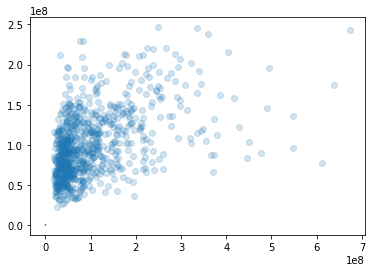

In [6]:
#prediction on Train Data

y_train_pred = model.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 400], [0, 400])

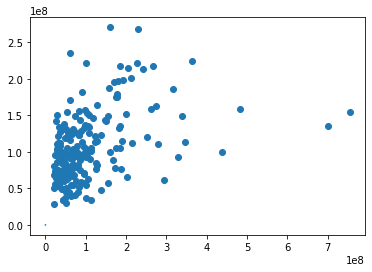

In [7]:
#prediction on Test Data
y_test_pred = model.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.plot([0, 400], [0, 400])

Text(0.5, 1.0, 'Residuals vs. Predictions')

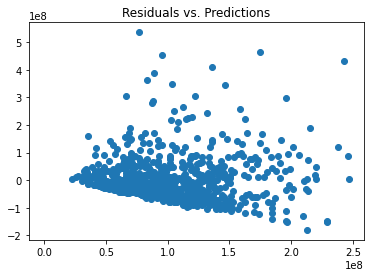

In [8]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.plot([0,400], [0, 0])
plt.title("Residuals vs. Predictions")

### Lasso Regression

#### Standard Scaler
- Required for regularization / Doesn't change model performance of a non-scaled model.

In [9]:
# Setup of variables in Cross Validation code funnel into this
# .fit finds mean and standard deviation of variable in the training set

scaler = StandardScaler().fit(X_train)

# applies scaler to train set
X_train_scaled = scaler.transform(X_train)
#print(X_train_scaled)

# .fit finds mean and standard deviation of variable in test set
scaler = StandardScaler().fit(X_test)

# applies scaler to test set
X_test_scaled = scaler.transform(X_test)
#print(X_test_scaled)

#### Fit and Score Lasso model on Train 

In [10]:
# Fit Lasso and Score on Train Data
# default alphas = 100
lasso = LassoCV()
lasso.fit(X_train_scaled,y_train)
lasso.score(X_train_scaled,y_train)

0.21257036782605399

#### Lasso Score on Test Data

In [11]:
# Score lasso on Test
lasso.score(X_test_scaled, y_test)

0.17944309039232276

#### Ridge Regression 

In [12]:
# lr_model_ridge = Ridge(alpha = 2) # alpha is regularization strength
# lr_model_ridge.fit(X_train,y_train)

### Coefficient Analysis Linear Regression Model
- Model must be fitted for it to work
- The coef_ contain the coefficients for the prediction of each of the targets. It is also the same as if you trained a model to predict each of the targets separately.

In [13]:
#model.coef_

#### Coefficients on Test Set

In [14]:
test_fit = model.fit(X_test,y_test)
coefficients_tst = pd.DataFrame(test_fit.coef_,X.columns, columns=['Coefficient'])
coefficients_tst

,Coefficient
Budget_Adjust,5.091847e-01
Action_Adv,8.177097e+06
Adv_Scifi,2.761603e+06
PG-13,1.020637e+07
Duration,9.345524e+05


### Get Predictions on Linear Regression train + test data

In [15]:
predictions = model.predict(X_test)
#predictions


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "['Budget_Adjust', 'Action_Adv', 'Adv_Scifi', 'PG-13', 'Duration']")

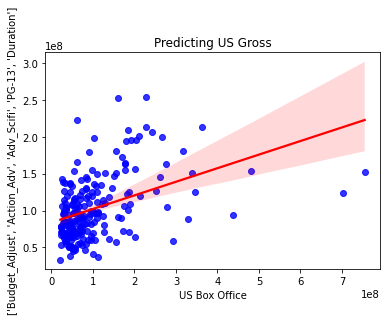

In [16]:
#visually plot 
p = sns.regplot(y_test,predictions,scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title='Predicting US Gross')

plt.xlabel("US Box Office")
plt.ylabel(f'{features_in}')

In [17]:
#manually test accuracy
predictions = model.predict(X_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

df_comparison = pd.merge(df_results, strd_base, how="inner", left_on="Actual", right_on='Gross_Adjust')
df_comparison.columns

Index(['Actual', 'Predicted', 'Title', 'Duration', 'Genre', 'Rating', 'Gross',
       'Director', 'Lead', 'Budget', 'Year', 'Budget_Adjust', 'Gross_Adjust',
       'Action', 'Adventure', 'Sci-Fi', 'Crime', 'Drama', 'Horror', 'Mystery',
       'Comedy', 'History', 'Biography', 'Fantasy', 'Romance', 'Action_Adv',
       'Adv_Scifi', 'R', 'PG-13'],
      dtype='object')

In [18]:
strd_base.columns

Index(['Title', 'Duration', 'Genre', 'Rating', 'Gross', 'Director', 'Lead',
       'Budget', 'Year', 'Budget_Adjust', 'Gross_Adjust', 'Action',
       'Adventure', 'Sci-Fi', 'Crime', 'Drama', 'Horror', 'Mystery', 'Comedy',
       'History', 'Biography', 'Fantasy', 'Romance', 'Action_Adv', 'Adv_Scifi',
       'R', 'PG-13'],
      dtype='object')

### See Predictions by Row - Fun! 

In [21]:
#manually shows comparison. Change out features to see how prediction changes. 
pred_df = df_comparison[['Title','Predicted', 
               'Actual',
               'Budget_Adjust',
               'Action_Adv',
               'Adv_Scifi', 'PG-13', 'Duration']]
pd.options.display.float_format = '{:,.2f}'.format

In [22]:
pred_df

,Title,Predicted,Actual,Budget_Adjust,Action_Adv,Adv_Scifi,PG-13,Duration
0,Die Hard with a Vengeance,"164,505,015.16","177,819,617.50","160,021,653.50",1,1,0,128
1,The Expendables 3,"137,987,061.88","45,005,999.90","91,568,667.20",1,1,1,126
2,Game Night,"77,187,065.17","74,652,258.20","39,926,764.30",1,1,0,100
3,When a Stranger Calls,"45,965,307.68","79,910,023.40","5,598,553.70",0,0,0,97
4,Cold Pursuit,"104,232,851.31","34,065,078.60","63,593,799.50",1,0,0,119
...,...,...,...,...,...,...,...,...
211,Looper,"92,641,867.75","78,472,413.50","35,406,413.10",1,1,0,119
212,Nancy Drew,"58,292,526.28","33,469,059.30","26,137,492.60",0,0,0,99
213,Conspiracy Theory,"151,278,429.54","128,276,016.20","126,621,495.30",1,0,0,135
214,Red Dawn,"99,960,577.86","100,094,596.70","44,335,803.70",1,0,1,114


### MAE + MAPE Scores

#### MAE (Mean Absolute Error) SCORE
- This tells us that the average difference between the actual data value and the value predicted by the model is {mae value}

- The lower the MAE for a given model, the more closely the model is able to predict the actual values.

In [23]:
actual = pred_df['Actual']
pred = pred_df['Predicted']

mae(actual, pred)


52916385.34587512

#### MAPE SCORE

In [24]:
# y_true = pred_df['Actual']
# y_pred = pred_df['Predicted']

In [25]:
# #y_true = correct target values.  y_pred = Estimated target values                                
# print(mean_absolute_percentage_error(y_true, y_pred))

#### mae Interpretation 
https://www.statology.org/mean-absolute-error-python/#:~:text=We%20can%20easily%20calculate%20the,()%20function%20from%20Scikit%2Dlearn.<br>

https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383

https://stackoverflow.com/questions/40323393/what-does-the-mae-actually-telling-me

This tells us that the average difference between the actual data value and the value predicted by the model is {mae value}

The lower the MAE for a given model, the more closely the model is able to predict the actual values.

#### MAPE Interpretation

https://datagy.io/mape-python
The lower the value for MAPE, the better the machine learning model is at predicting values. Inversely, the higher the value for MAPE, the worse the model is at predicting values.

For example, if we calculate a MAPE value of 20% for a given machine learning model, then the average difference between the predicted value and the actual value is 20%.

https://blog.arkieva.com/two-sides-of-the-mape-coin/